In [91]:
import great_expectations as ge
import pandas as pd
import numpy as np
from great_expectations.jupyter_ux import(
    display_column_expectations_as_section,
    display_profiled_column_evrs_as_section
)
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
df  = ge.read_excel("/home/vy/sample.xls")

df



,0,First Name,Last Name,Gender,Country,Age,Date,Id
0,1,Dulce,Abril,Female,United States,32,15/10/2017,1562
1,2,Mara,Hashimoto,Female,Great Britain,25,16/08/2016,1582
2,3,Philip,Gent,Male,France,36,21/05/2015,2587
3,4,Kathleen,Hanner,Female,United States,25,15/10/2017,3549
4,5,Nereida,Magwood,Female,United States,58,16/08/2016,2468
5,6,Gaston,Brumm,Male,United States,24,21/05/2015,2554
6,7,Etta,Hurn,Female,Great Britain,56,15/10/2017,3598
7,8,Earlean,Melgar,Female,United States,27,16/08/2016,2456
8,9,Vincenza,Weiland,Female,United States,40,21/05/2015,6548
9,10,Dulce,Abril,Female,United States,50,15/10/2018,1563


In [64]:
df.expect_column_values_to_be_between("Age", min_value=30, max_value=50)

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "result": {
    "element_count": 20,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 13,
    "unexpected_percent": 65.0,
    "unexpected_percent_total": 65.0,
    "unexpected_percent_nonmissing": 65.0,
    "partial_unexpected_list": [
      25,
      25,
      58,
      24,
      56,
      27,
      26,
      65,
      26,
      57,
      28,
      27,
      27
    ]
  },
  "success": false,
  "meta": {}
}

In [65]:
# df.expect_tab

(array([12.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  3.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

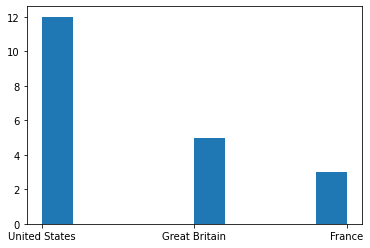

In [66]:
plt.hist(df['Country'])

In [67]:
age_partition = ge.dataset.util.continuous_partition_data(df['Age'])

In [68]:
age_partition

{'bins': array([24.        , 30.83333333, 37.66666667, 44.5       , 51.33333333,
        58.16666667, 65.        ]),
 'weights': array([0.45, 0.15, 0.15, 0.05, 0.15, 0.05])}

In [69]:
df.expect_column_bootstrapped_ks_test_p_value_to_be_greater_than('Age',age_partition)

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "result": {
    "observed_value": 0.7992007992007992,
    "element_count": 20,
    "missing_count": null,
    "missing_percent": null
  },
  "success": true,
  "meta": {}
}

In [70]:
id_partition = ge.dataset.util.continuous_partition_data(df['Id'])

In [93]:
df.expect_column_bootstrapped_ks_test_p_value_to_be_greater_than('Id',id_partition)

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "result": {
    "observed_value": 0.6203796203796204,
    "element_count": 20,
    "missing_count": null,
    "missing_percent": null
  },
  "success": true,
  "meta": {}
}

In [94]:
df.get_expectations_config()

2022-03-22T15:30:52+0530 - INFO - 	1 expectation(s) included in expectation_suite. result_format settings filtered.


/home/vy/anaconda3/lib/python3.9/site-packages/great_expectations/data_asset/data_asset.py:539: DeprecationWarning: get_expectations_config is deprecated, and will be removed in a future release. Please use get_expectation_suite instead.
  warnings.warn(


{
  "expectation_suite_name": "default",
  "data_asset_type": "Dataset",
  "ge_cloud_id": null,
  "meta": {
    "great_expectations_version": "0.14.9"
  },
  "expectations": [
    {
      "expectation_type": "expect_column_bootstrapped_ks_test_p_value_to_be_greater_than",
      "kwargs": {
        "column": "Id",
        "partition_object": {
          "bins": [
            1562.0,
            2393.1666666666665,
            3224.333333333333,
            4055.5,
            4886.666666666666,
            5717.833333333333,
            6549.0
          ],
          "weights": [
            0.3,
            0.35,
            0.25,
            0.0,
            0.0,
            0.1
          ]
        }
      },
      "meta": {}
    }
  ]
}

In [95]:
df.get_expectation_suite()

2022-03-22T15:30:53+0530 - INFO - 	1 expectation(s) included in expectation_suite. result_format settings filtered.


{
  "expectation_suite_name": "default",
  "data_asset_type": "Dataset",
  "ge_cloud_id": null,
  "meta": {
    "great_expectations_version": "0.14.9"
  },
  "expectations": [
    {
      "expectation_type": "expect_column_bootstrapped_ks_test_p_value_to_be_greater_than",
      "kwargs": {
        "column": "Id",
        "partition_object": {
          "bins": [
            1562.0,
            2393.1666666666665,
            3224.333333333333,
            4055.5,
            4886.666666666666,
            5717.833333333333,
            6549.0
          ],
          "weights": [
            0.3,
            0.35,
            0.25,
            0.0,
            0.0,
            0.1
          ]
        }
      },
      "meta": {}
    }
  ]
}

In [96]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [97]:
def build_transformer(df_train):
    le = ()
    ohe = OneHotEncoder()
    x_cat = pd.DataFrame()
    for cat_column in continuous_columns:
        le[cat_column] = LabelEncoder()
        x_cat[cat_column + '_le'] = le[cat_column].fit_transform(df_train[cat_column])
    x_cat = ohe.fit_transform(x_cat)
    x_train = np.append(x_cat.toarray(), df_train[continuous_columns], axis = 1)

    return le, ohe, x_train

In [98]:
# def apply_transformer(le, ohe, df_test):
#     x_Cat = pd.DataFrame()
#     for cat_column in categorical_columns:
#         x_Cat[cat_column + '_le'] = le[cat_column].transform(df_test[cat_column])
#     x_cat = ohe.transform(x_cat)
#     x_test = np.append(x_cat.toarray(), df_test[continuous_columns], axis = 1)

In [99]:
# clf = RandomForestClassifier()
# le, ohe, x_train = build_transformer(df)
# clf.fit(x_train, df['Id'])

In [100]:
df

,0,First Name,Last Name,Gender,Country,Age,Date,Id
0,1,Dulce,Abril,Female,United States,32,15/10/2017,1562
1,2,Mara,Hashimoto,Female,Great Britain,25,16/08/2016,1582
2,3,Philip,Gent,Male,France,36,21/05/2015,2587
3,4,Kathleen,Hanner,Female,United States,25,15/10/2017,3549
4,5,Nereida,Magwood,Female,United States,58,16/08/2016,2468
5,6,Gaston,Brumm,Male,United States,24,21/05/2015,2554
6,7,Etta,Hurn,Female,Great Britain,56,15/10/2017,3598
7,8,Earlean,Melgar,Female,United States,27,16/08/2016,2456
8,9,Vincenza,Weiland,Female,United States,40,21/05/2015,6548
9,10,Dulce,Abril,Female,United States,50,15/10/2018,1563


In [101]:
df.expect_column_distinct_values_to_be_in_set("Gender", ["Male", "Female"])

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "result": {
    "observed_value": [
      "Female",
      "Male"
    ],
    "element_count": 20,
    "missing_count": null,
    "missing_percent": null
  },
  "success": true,
  "meta": {}
}

In [102]:
def our_processing_pipline(df):
    for column in df.columns:
        if isinstance(df[column][0], str):
            df[column] = df[column].apply(str.strip)

In [103]:
our_processing_pipline(df)

In [104]:
df.expect_column_distinct_values_to_be_in_set("Gender", ["Male", "Female"])

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "result": {
    "observed_value": [
      "Female",
      "Male"
    ],
    "element_count": 20,
    "missing_count": null,
    "missing_percent": null
  },
  "success": true,
  "meta": {}
}

In [105]:
df.expect_column_values_to_not_be_null("Age")

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "result": {
    "element_count": 20,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "partial_unexpected_list": []
  },
  "success": true,
  "meta": {}
}

In [106]:
df.expect_column_values_to_be_increasing("Id")

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "result": {
    "element_count": 20,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 5,
    "unexpected_percent": 25.0,
    "unexpected_percent_total": 25.0,
    "unexpected_percent_nonmissing": 25.0,
    "partial_unexpected_list": [
      2468,
      2456,
      1563,
      2457,
      1564
    ]
  },
  "success": false,
  "meta": {}
}

In [107]:
config = df.get_expectation_suite()

2022-03-22T15:30:55+0530 - INFO - 	3 expectation(s) included in expectation_suite. Omitting 1 expectation(s) that failed when last run; set discard_failed_expectations=False to include them. result_format settings filtered.


In [108]:
df.save_expectation_suite("./test.json")

2022-03-22T15:30:55+0530 - INFO - 	3 expectation(s) included in expectation_suite. Omitting 1 expectation(s) that failed when last run; set discard_failed_expectations=False to include them. result_format settings filtered.


In [109]:
df.validate(expectation_suite=config)

{
  "statistics": {
    "evaluated_expectations": 3,
    "successful_expectations": 3,
    "unsuccessful_expectations": 0,
    "success_percent": 100.0
  },
  "results": [
    {
      "expectation_config": {
        "expectation_type": "expect_column_bootstrapped_ks_test_p_value_to_be_greater_than",
        "kwargs": {
          "column": "Id",
          "partition_object": {
            "bins": [
              1562.0,
              2393.1666666666665,
              3224.333333333333,
              4055.5,
              4886.666666666666,
              5717.833333333333,
              6549.0
            ],
            "weights": [
              0.3,
              0.35,
              0.25,
              0.0,
              0.0,
              0.1
            ]
          }
        },
        "meta": {}
      },
      "exception_info": {
        "raised_exception": false,
        "exception_message": null,
        "exception_traceback": null
      },
      "result": {
        "observed_valu

In [114]:
context = ge.get_context()

mybatch = context.get_batch(
        datasource_name="df",
        data_connector_name="limited_table",
    data_asset_name="collisions"
)
mybatch.head()

2022-03-22T15:34:47+0530 - WARNING - schema_name specified creating a URL with schema is not supported. Set a default schema on the user connecting to your database.


DatasourceError: Cannot initialize datasource df, error: The given datasource could not be retrieved from the DataContext; please confirm that your configuration is accurate.

In [110]:

display_column_expectations_as_section(df, column="Age")

AttributeError: 'PandasDataset' object has no attribute 'expectations'